In [3]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/income.csv')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


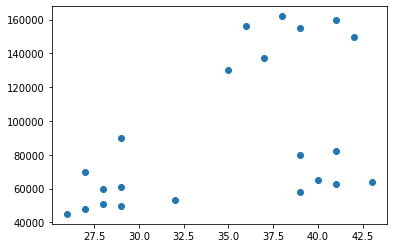

In [4]:
# lets plot the data first
plt.scatter(data['Age'], data["Income($)"])

In [7]:
# we can clearly see that we have 3 groups or clusters, so we would take our k value as 3
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
prediction = model.fit_predict(data[["Age", "Income($)"]])
prediction

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [8]:
# lets plot our predicted values
# firstly make a prediction column in the data
data["prediction"] = prediction
data.head()

,Name,Age,Income($),prediction
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


Text(0, 0.5, 'Income ($)')

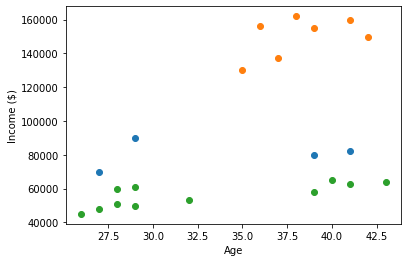

In [10]:
# create 3 seperate datafram to plot the scatter graph
df1 = data[data.prediction==0]
df2 = data[data.prediction==1]
df3 = data[data.prediction==2]

plt.scatter(df1.Age, df1["Income($)"])
plt.scatter(df2.Age, df2["Income($)"])
plt.scatter(df3.Age, df3["Income($)"])

plt.xlabel('Age')
plt.ylabel('Income ($)')

In [11]:
# this is somewhat not good because we have not sone any pre processing
# lets use minmaxscaler to scale the data
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

# scaling the income column
scale.fit(data[["Income($)"]])
data["Income($)"] = scale.fit_transform(data[["Income($)"]])

# scaling the age column
scale.fit(data[["Age"]])
data["Age"] = scale.fit_transform(data[["Age"]])


data.head()

,Name,Age,Income($),prediction
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [12]:
# now the age and income is scaled, use the kmeans again to get predictions

model = KMeans(n_clusters=3)
prediction = model.fit_predict(data[["Age", "Income($)"]])
data["prediction"] = prediction
data.head()

,Name,Age,Income($),prediction
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2


No handles with labels found to put in legend.


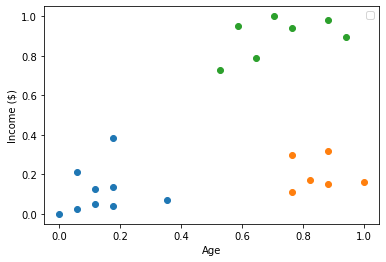

In [15]:
# now plotting the scatter plot
# create 3 seperate datafram to plot the scatter graph
df1 = data[data.prediction==0]
df2 = data[data.prediction==1]
df3 = data[data.prediction==2]

plt.scatter(df1.Age, df1["Income($)"])
plt.scatter(df2.Age, df2["Income($)"])
plt.scatter(df3.Age, df3["Income($)"])

plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [13]:
# we have another feature in the sklearn to find the centroid of the clusters
model.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

Text(0, 0.5, 'Income ($)')

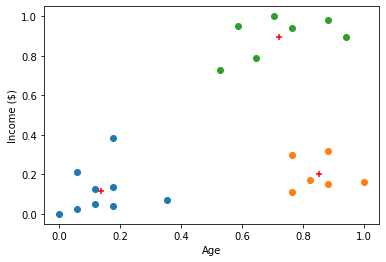

In [18]:
# now lets plot these centroid too in the scatter plot
# create 3 seperate dataframes to plot the scatter graph

df1 = data[data.prediction==0]
df2 = data[data.prediction==1]
df3 = data[data.prediction==2]

plt.scatter(df1.Age, df1["Income($)"])
plt.scatter(df2.Age, df2["Income($)"])
plt.scatter(df3.Age, df3["Income($)"])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color = "red",marker="+")

plt.xlabel('Age')
plt.ylabel('Income ($)')

In [19]:
# lets explore the elbow method
# we have to plot the sum of squared error for this
# inertis metod helps us for that

sum_of_squared_error = []

# finding the sum of squared error for k value in range 1 to 10
for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(data[["Age", "Income($)"]])
    sum_of_squared_error.append(model.inertia_)


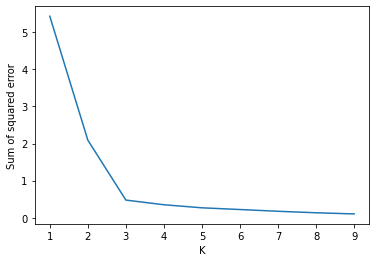

In [21]:
# now lets plotting the sum of squared error

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1,10),sum_of_squared_error)

In [ ]:
# in the graph we can see that 3 is our elbow point(elbow shape) and so the optimal value of k is 3